## **Introduction:**
- The Titanic dataset is one of the most popular datasets in data science and analytics. It contains information about the passengers on the Titanic, including their age, gender, class, family details, and whether they survived the disaster.
- The main goal of this analysis is to explore the dataset, perform data cleaning, and find meaningful insights using exploratory data analysis (EDA) and visualizations. This project helps us understand which factors influenced survival and how passenger demographics affected the outcomes.

In [1]:
# Important libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Load Data

In [2]:
titanic=pd.read_csv("titanic.csv")

### Basics info about dataset

In [3]:
titanic.shape

(891, 12)

In [4]:
print("Columns:\n",titanic.columns)

Columns:
 Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


In [5]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


## Dataset Overview

In [7]:
print("Rows, Columns:", titanic.shape)

Rows, Columns: (891, 12)


In [8]:
titanic.describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Braund, Mr. Owen Harris",male,NaN,NaN,NaN,347082,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


## Missing Value Handling

In [9]:
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

***1. Fill Age with mean/median***

In [10]:
titanic['Age']=titanic['Age'].fillna(titanic['Age'].median())

***2. Fill Embarked with mode***

In [11]:
titanic['Embarked']=titanic['Embarked'].fillna(titanic['Embarked'].mode())

***3. Drop Cabin (too many missing values)***

In [12]:
titanic.drop('Cabin', axis=1, inplace=True)

 ## Univariate Analysis 
 ***1. Survival count***

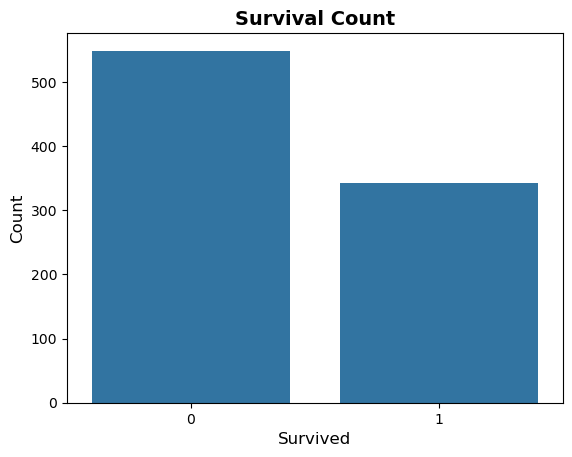

In [13]:
sns.countplot(x='Survived', data=titanic)
plt.title("Survival Count", fontsize=14, fontweight='bold')
plt.xlabel("Survived", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.show()

***2. Passenger Class***

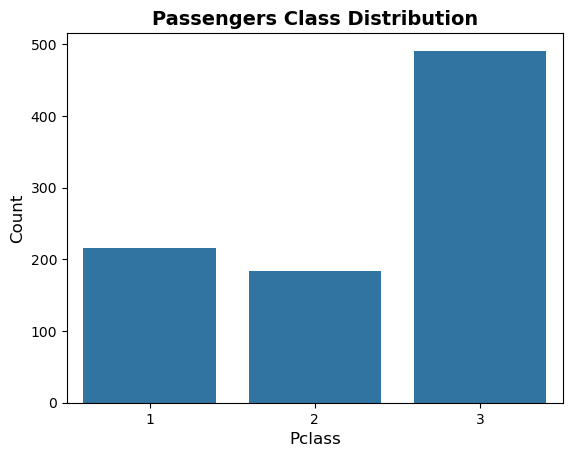

In [14]:
sns.countplot(x='Pclass', data=titanic)
plt.title("Passengers Class Distribution", fontsize=14,
         fontweight='bold')
plt.xlabel("Pclass", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.show()

***3. Gender Distribution***

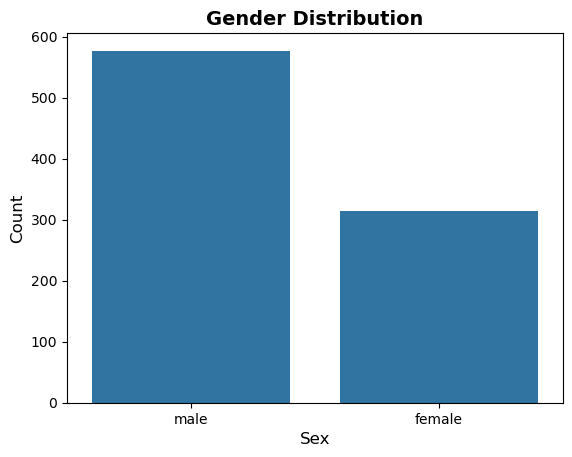

In [15]:
sns.countplot(x='Sex', data=titanic)
plt.title("Gender Distribution", fontsize=14,
        fontweight='bold')
plt.xlabel("Sex", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.show()

## Bivariate Analysis (Survival vs Features)
***1. Survival Rate by Gender***

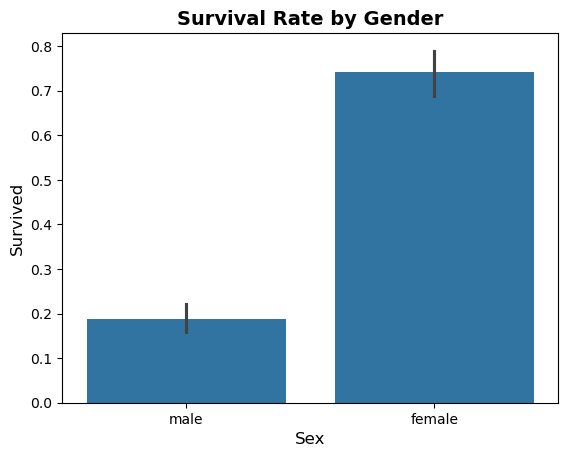

In [16]:
sns.barplot(x='Sex', y='Survived', data=titanic)
plt.title("Survival Rate by Gender", fontsize=14,
        fontweight='bold')
plt.xlabel("Sex", fontsize=12)
plt.ylabel("Survived", fontsize=12)
plt.show()

***2. Survival by Passenger Class***

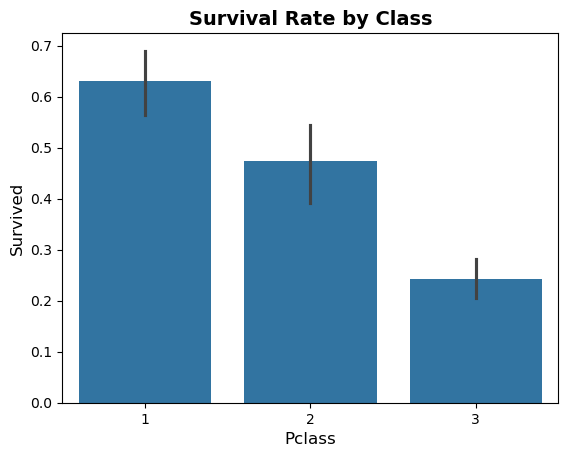

In [17]:
sns.barplot(x='Pclass', y='Survived', data=titanic)
plt.title("Survival Rate by Class", fontsize=14,
        fontweight='bold')
plt.xlabel("Pclass", fontsize=12)
plt.ylabel("Survived", fontsize=12)
plt.show()

***3. Survival by Age***

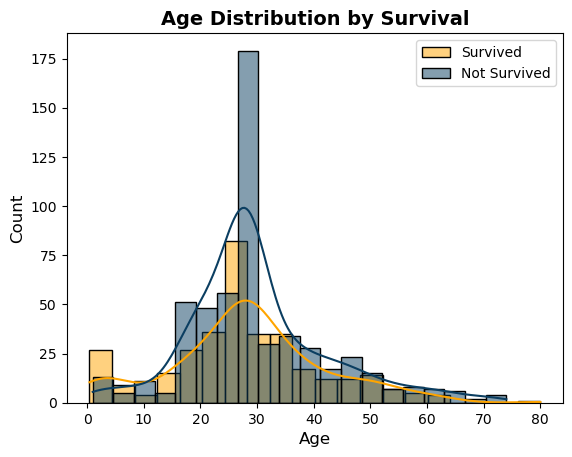

In [18]:
sns.histplot(titanic[titanic['Survived']==1]['Age'],
             bins=20, color='orange', 
             label='Survived', kde=True)
sns.histplot(titanic[titanic['Survived']==0]['Age'],
             bins=20,  color='#0B3E61',
             label='Not Survived', kde=True)
plt.legend()
plt.title("Age Distribution by Survival", fontsize=14,
        fontweight='bold')
plt.xlabel("Age", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.show()

## Multivariate Analysis
***1. Survival by Gender & Class***

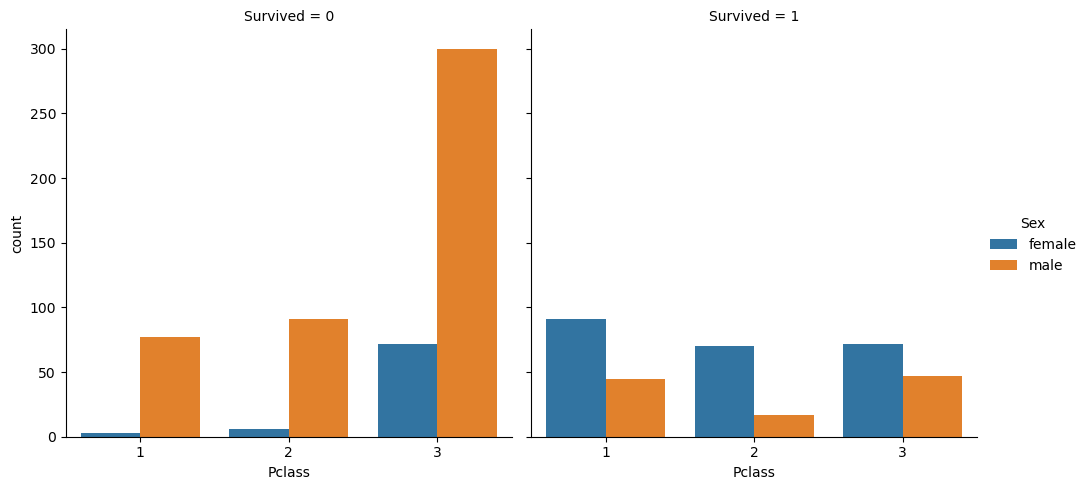

In [19]:
sns.catplot(x="Pclass", hue="Sex", col="Survived",
            kind="count", data=titanic)

plt.show()

***2. Correlation Heatmap***

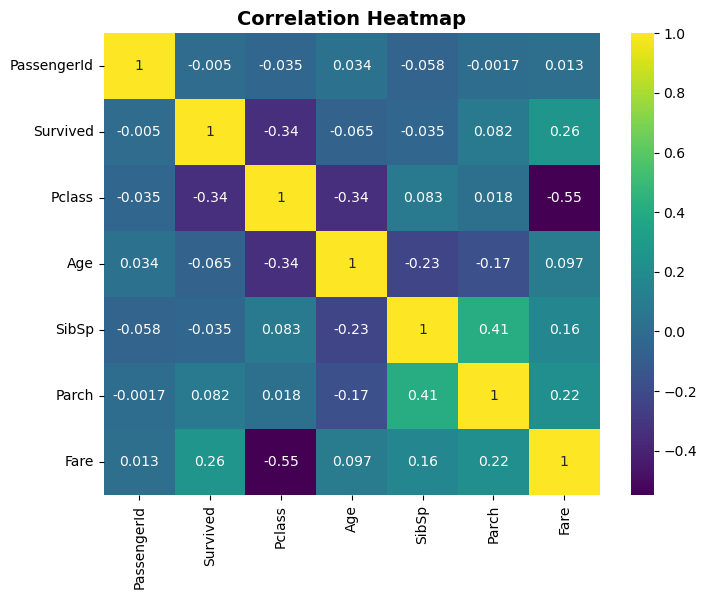

In [20]:
plt.figure(figsize=(8,6))
sns.heatmap(titanic.corr(numeric_only=True),
            annot=True, cmap='viridis')
plt.title("Correlation Heatmap", fontsize=14,
        fontweight='bold')
plt.show()

## Key Insights:
- **Females** had a higher survival rate compared to males.

- Passengers in **1st** class survived more than those in 2nd and 3rd class.

- Younger passengers (children) had better survival chances than older passengers.     

- Passengers embarking from port **'C'** had higher survival rates compared to other ports.

## Conclusion:
The Titanic EDA shows that gender, passenger class, and age played an important role in survival. **Women** and **children** had a better chance of survival compared to men. **First-class** passengers survived more than second and third-class passengers. **Younger passengers** had higher survival rates compared to older passengers. The analysis also shows that passengers who boarded from port **'C'** survived more compared to other ports.

## Future Scope:
- This EDA can be extended by applying machine learning models (like Logistic Regression, Random Forest, etc.) to predict passenger survival.

- More feature engineering (such as creating new features like family size, title extraction from names, etc.) can improve insights.

- The analysis can be made more interactive using dashboard tools like Power BI or Tableau.

- Additional datasets (like ship crew data or weather/ocean conditions) can be combined for deeper analysis.
